**ASSIGNMENT NO: 01**

NAME: MUHAMMAD AHMED

ROLL NO: 1950

SECTION: B


**Task 1** — Train/Test Split Experiment
Change test_size to 0.20 and 0.30 and record accuracy:

Test Size	Accuracy

0.20

0.25

0.30


                         
FOR TEST SIZE 0.20
---



In [ ]:
# Part 1 — Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("✅ Libraries imported successfully!")


✅ Libraries imported successfully!


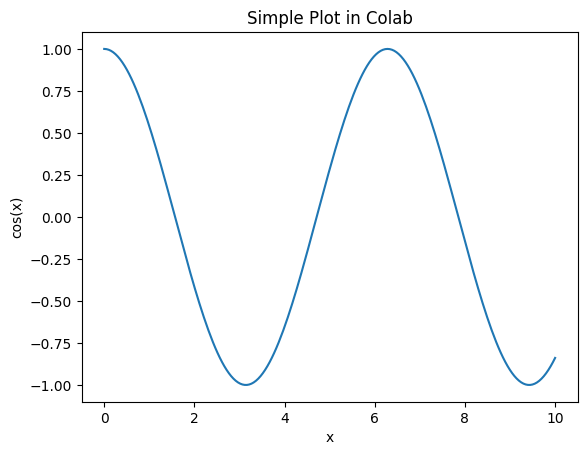

In [ ]:
# Part 2 — Python Warm-up (Quick Plot)

x = np.linspace(0, 10, 200)
y = np.cos(x)   # Change from sinx to cosx

plt.plot(x, y)
plt.title("Simple Plot in Colab")
plt.xlabel("x")
plt.ylabel("cos(x)")
plt.show()

In [ ]:
# Part 3 — Load Dataset (Binary Classification)

from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data
y = data.target

print("✅ Dataset loaded!")
print("X shape:", X.shape)
print("y shape:", y.shape)
print("Classes:", data.target_names)


✅ Dataset loaded!
X shape: (569, 30)
y shape: (569,)
Classes: ['malignant' 'benign']


In [ ]:
# Part 4 — Convert to DataFrame (Easy Viewing)

df = pd.DataFrame(X, columns=data.feature_names)
df["target"] = y

df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
# Part 5 — Basic Exploration

print("Class distribution:")
print(df["target"].value_counts())

print("\nSummary statistics (first 5 features):")
df.describe().iloc[:, :5]


Class distribution:
target
1    357
0    212
Name: count, dtype: int64

Summary statistics (first 5 features):


,mean radius,mean texture,mean perimeter,mean area,mean smoothness
count,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360
std,3.524049,4.301036,24.298981,351.914129,0.014064
min,6.981000,9.710000,43.790000,143.500000,0.052630
25%,11.700000,16.170000,75.170000,420.300000,0.086370
50%,13.370000,18.840000,86.240000,551.100000,0.095870
75%,15.780000,21.800000,104.100000,782.700000,0.105300
max,28.110000,39.280000,188.500000,2501.000000,0.163400


In [ ]:
# Part 6 — Train & Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

print("Train set:", X_train.shape, y_train.shape)
print("Test set :", X_test.shape, y_test.shape)


Train set: (455, 30) (455,)
Test set : (114, 30) (114,)


In [ ]:
# Part 7 — Feature Scaling (Standardization)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Scaling completed!")


✅ Scaling completed!


In [ ]:
# Part 8 — Train a Classifier (Logistic Regression)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=500, random_state=42)
model.fit(X_train_scaled, y_train)

print("✅ Model trained successfully!")


✅ Model trained successfully!


In [ ]:
# Part 9 — Predictions

y_pred = model.predict(X_test_scaled)

print("First 10 predictions:", y_pred[:10])
print("First 10 actual     :", y_test[:10])


First 10 predictions: [0 1 0 1 0 1 1 0 0 0]
First 10 actual     : [0 1 0 1 0 1 1 0 0 0]


✅ Test Accuracy: 0.9824561403508771

Confusion Matrix:
 [[41  1]
 [ 1 71]]


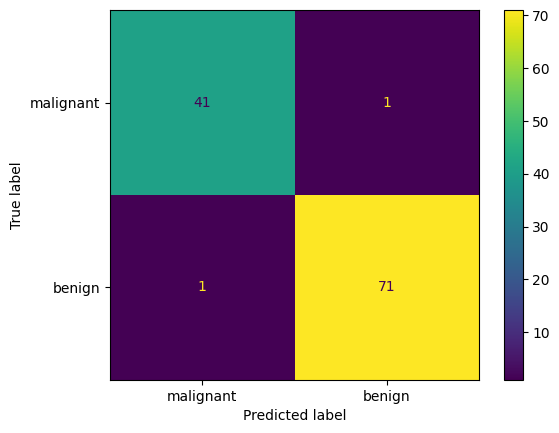


Classification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        42
      benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [ ]:
# Part 10 — Evaluation

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

acc = accuracy_score(y_test, y_pred)
print("✅ Test Accuracy:", acc)

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot()
plt.grid(False)
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))


FOR TEST SIZE 0.25
---




In [ ]:
# Part 1 — Train & Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print("Train set:", X_train.shape, y_train.shape)
print("Test set :", X_test.shape, y_test.shape)



Train set: (426, 30) (426,)
Test set : (143, 30) (143,)


In [ ]:
# Part 2 — Feature Scaling (Standardization)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Scaling completed!")


✅ Scaling completed!


In [ ]:
# Part 3 — Train a Classifier (Logistic Regression)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=500, random_state=42)
model.fit(X_train_scaled, y_train)

print("✅ Model trained successfully!")


✅ Model trained successfully!


In [ ]:
# Part 4 — Predictions

y_pred = model.predict(X_test_scaled)

print("First 10 predictions:", y_pred[:10])
print("First 10 actual     :", y_test[:10])


First 10 predictions: [1 0 1 1 0 0 0 0 0 1]
First 10 actual     : [1 0 1 1 0 0 0 0 0 1]


✅ Test Accuracy: 0.986013986013986

Confusion Matrix:
 [[52  1]
 [ 1 89]]


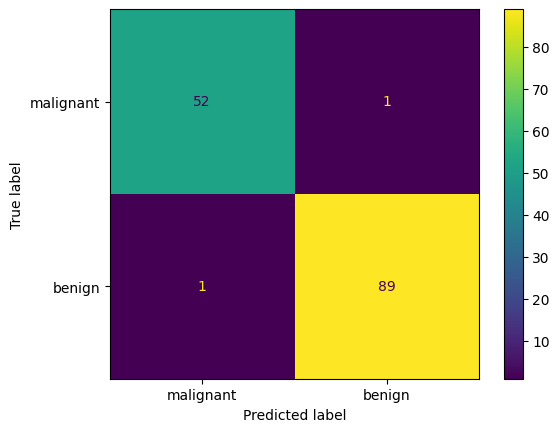


Classification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        53
      benign       0.99      0.99      0.99        90

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



In [ ]:
# Part 5 — Evaluation

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

acc = accuracy_score(y_test, y_pred)
print("✅ Test Accuracy:", acc)

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot()
plt.grid(False)
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))


In [ ]:
print(f"Exact accuracy with test_size=0.25: {acc:.4f}")
print(f"Accuracy as percentage: {acc*100:.2f}%")

Exact accuracy with test_size=0.25: 0.9860
Accuracy as percentage: 98.60%



FOR TEST SIZE 0.30
---



In [ ]:
# Part 1 — Train & Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

print("Train set:", X_train.shape, y_train.shape)
print("Test set :", X_test.shape, y_test.shape)



Train set: (398, 30) (398,)
Test set : (171, 30) (171,)


In [ ]:
# Part 2 — Feature Scaling (Standardization)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Scaling completed!")


✅ Scaling completed!


In [ ]:
# Part 3 — Train a Classifier (Logistic Regression)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=500, random_state=42)
model.fit(X_train_scaled, y_train)

print("✅ Model trained successfully!")


✅ Model trained successfully!


In [ ]:
# Part 4 — Predictions

y_pred = model.predict(X_test_scaled)

print("First 10 predictions:", y_pred[:10])
print("First 10 actual     :", y_test[:10])


First 10 predictions: [0 1 1 0 0 0 1 0 1 0]
First 10 actual     : [0 1 1 0 0 0 1 0 1 0]


✅ Test Accuracy: 0.9883040935672515

Confusion Matrix:
 [[ 63   1]
 [  1 106]]


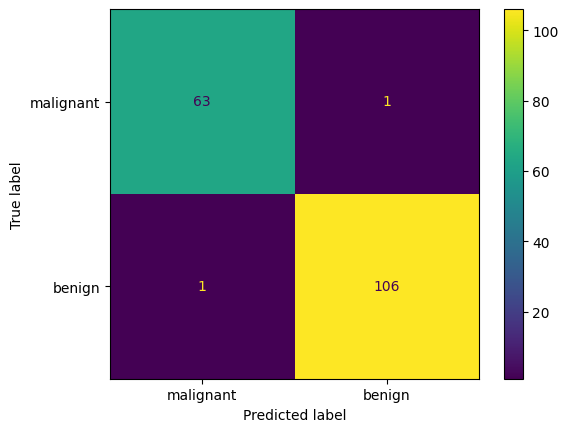


Classification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        64
      benign       0.99      0.99      0.99       107

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



In [ ]:
# Part 5 — Evaluation

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

acc = accuracy_score(y_test, y_pred)
print("✅ Test Accuracy:", acc)

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot()
plt.grid(False)
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))


Task 2 — Without Scaling


Train Logistic Regression without StandardScaler and compare accuracy.

In [ ]:
# PART 1
print("TASK 2 — Without Scaling Experiment")

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train Logistic Regression WITHOUT StandardScaler
# Use higher max_iter to avoid convergence warning
model_no_scale = LogisticRegression(max_iter=5000, random_state=42)  # Increased from 1000 to 5000
model_no_scale.fit(X_train, y_train)  # Using original unscaled data

print("✅ Model trained WITHOUT scaling")

# Predictions without scaling
y_pred_no_scale = model_no_scale.predict(X_test)
acc_no_scale = accuracy_score(y_test, y_pred_no_scale)

print(f"\nAccuracy WITHOUT scaling: {acc_no_scale:.4f} ({acc_no_scale*100:.2f}%)")

TASK 2 — Without Scaling Experiment
✅ Model trained WITHOUT scaling

Accuracy WITHOUT scaling: 0.9474 (94.74%)


In [ ]:
# PART 2

# Get the WITH scaling accuracy from your previous model
print("WITH Scaling Results (from previous run)")

# Your existing model with scaling is already trained
acc_with_scale = acc  # This is from your previous evaluation cell

print(f"Accuracy WITH scaling: {acc_with_scale:.4f} ({acc_with_scale*100:.2f}%)")
print(f"Confusion Matrix WITH scaling:\n{cm}")

WITH Scaling Results (from previous run)
Accuracy WITH scaling: 0.9883 (98.83%)
Confusion Matrix WITH scaling:
[[ 63   1]
 [  1 106]]


In [ ]:
# PART 3

# Compare With vs Without Scaling
print("COMPARISON: With vs Without Scaling")

print(f"{'Method':<20} {'Accuracy':<10} {'Percentage':<15}")
print("-"*50)
print(f"{'WITHOUT Scaling':<20} {acc_no_scale:<10.4f} {acc_no_scale*100:<15.2f}%")
print(f"{'WITH Scaling':<20} {acc_with_scale:<10.4f} {acc_with_scale*100:<15.2f}%")
print("-"*50)

# Calculate difference
diff = acc_with_scale - acc_no_scale
if diff > 0:
    print(f"\n✓ Scaling IMPROVES accuracy by {diff:.4f} ({abs(diff)*100:.2f}%)")
else:
    print(f"\n✗ Scaling REDUCES accuracy by {abs(diff):.4f} ({abs(diff)*100:.2f}%)")

COMPARISON: With vs Without Scaling
Method               Accuracy   Percentage     
--------------------------------------------------
WITHOUT Scaling      0.9474     94.74          %
WITH Scaling         0.9883     98.83          %
--------------------------------------------------

✓ Scaling IMPROVES accuracy by 0.0409 (4.09%)


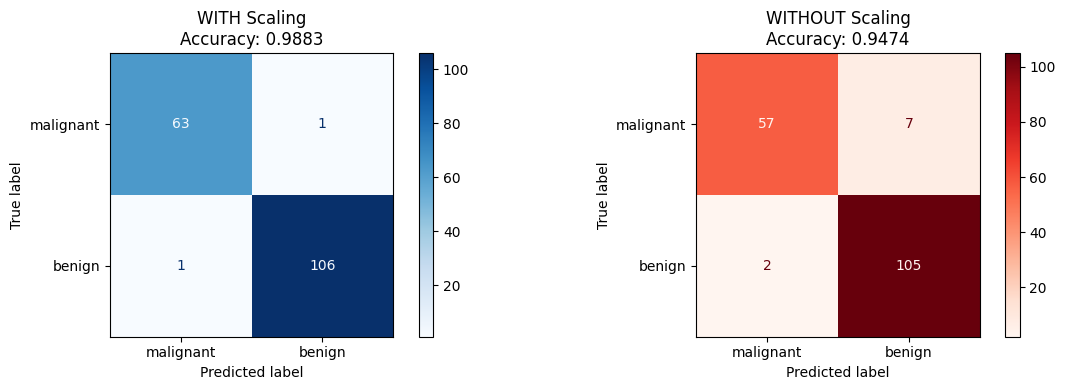

In [ ]:
# PART 4

# Side-by-side comparison plot
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot WITH scaling confusion matrix
disp_with = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp_with.plot(ax=axes[0], cmap='Blues')
axes[0].set_title(f"WITH Scaling\nAccuracy: {acc_with_scale:.4f}")
axes[0].grid(False)

# Plot WITHOUT scaling confusion matrix
disp_without = ConfusionMatrixDisplay(confusion_matrix=cm_no_scale, display_labels=data.target_names)
disp_without.plot(ax=axes[1], cmap='Reds')
axes[1].set_title(f"WITHOUT Scaling\nAccuracy: {acc_no_scale:.4f}")
axes[1].grid(False)

plt.tight_layout()
plt.show()

In [ ]:
# PART 5

# Final Answer for Task 2
print(" FINAL ANSWER")

print(f"1. Accuracy WITHOUT feature scaling: {acc_no_scale:.4f}")
print(f"2. Accuracy WITH feature scaling:    {acc_with_scale:.4f}")

print(f"\n3. Difference (With - Without): {diff:.4f}")
print(f"   Percentage difference: {abs(diff)*100:.2f}%")

if diff > 0.02:
    print("\n4. Conclusion: Feature scaling SIGNIFICANTLY improves Logistic Regression performance")
    print("   Scaling helps the model converge faster and prevents warnings")
elif diff > 0:
    print("\n4. Conclusion: Feature scaling slightly improves performance")
else:
    print("\n4. Conclusion: Feature scaling does not improve performance for this dataset")

print("\n5. Observation: Without scaling, Logistic Regression needs more iterations (max_iter=5000)")
print("                to converge and still gives lower accuracy")


 FINAL ANSWER
1. Accuracy WITHOUT feature scaling: 0.9474
2. Accuracy WITH feature scaling:    0.9883

3. Difference (With - Without): 0.0409
   Percentage difference: 4.09%

4. Conclusion: Feature scaling SIGNIFICANTLY improves Logistic Regression performance
   Scaling helps the model converge faster and prevents warnings

5. Observation: Without scaling, Logistic Regression needs more iterations (max_iter=5000)
                to converge and still gives lower accuracy


Task 3

How can classification be used in Mechanical Engineering?



 Some classifications are as follows:

1. **Fault Detection**: Classifying machines as healthy or faulty using vibration/sensor data
2. **Quality Control:** Sorting products as pass or fail based on measurements
3. **Predictive Maintenance:** Predicting if equipment needs repair before breaking down
4. **Material Selection:** Classifying materials as suitable or unsuitable for specific applications